<a href="https://colab.research.google.com/github/ktzh/NLPhomeworks/blob/main/jokes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 65.6 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
import string
import pymorphy3
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/jokes.csv", encoding='UTF8', sep=",")
df.head(10)

,theme,text,rating
0,pro-sudey,На суде в Стамбуле обвиняемый сказал:\r\n- На...,5
1,pro-sudey,"- Вы продолжаете утверждать, что обвиняемый н...",4
2,pro-sudey,"На суде.\r\n- Итак, когда дело дошло до столкн...",0
3,pro-sudey,Старую леди сбил автомобиль. На суде ее спраши...,4
4,pro-sudey,"Судья говорит:\r\n- Согласно вашей жалобе, об...",2
5,pro-sudey,На судебном заседании.\r\n- Гражданка Дроздова...,3
6,pro-sudey,- Драка происходила так. Одной рукой я схват...,-3
7,pro-sudey,"Судья:\r\n- Свидетель, вы должны говорить прав...",2
8,pro-sudey,"Судья подсудимому:\r\n- Ну-ну, перестаньте вол...",-2
9,pro-sudey,"Судья спрашивает четырех индейцев, убежавших ...",4


In [ ]:
#df.iloc[[1]]
df.tail(5)
#df['text'][0:10]

,theme,text,rating
130199,raznie,"Збежал медведь из зоопарка, ну передали по рад...",0
130200,raznie,"Разговаривают два грузина, Гоги и Авас:\r\nГ: ...",0
130201,raznie,В каждом из нас спит гений и с каждым днем вс...,0
130202,raznie,Очередь... Последней в ней стоит бабка - гор...,0
130203,raznie,- Рабинович! За вами три рубл&!\r\n- Где?\r\n\r\n,0


In [ ]:
df.head()

,theme,text,rating,prep
0,pro-sudey,На суде в Стамбуле обвиняемый сказал:\r\n- На...,5,на суде в стамбуле обвиняемый сказал:\r\n- на...
1,pro-sudey,"- Вы продолжаете утверждать, что обвиняемый н...",4,"- вы продолжаете утверждать, что обвиняемый н..."
2,pro-sudey,"На суде.\r\n- Итак, когда дело дошло до столкн...",0,"на суде.\r\n- итак, когда дело дошло до столкн..."
3,pro-sudey,Старую леди сбил автомобиль. На суде ее спраши...,4,старую леди сбил автомобиль. на суде ее спраши...
4,pro-sudey,"Судья говорит:\r\n- Согласно вашей жалобе, об...",2,"судья говорит:\r\n- согласно вашей жалобе, об..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130204 entries, 0 to 130203
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   theme   130204 non-null  object
 1   text    130204 non-null  object
 2   rating  130204 non-null  int64 
 3   prep    130204 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.0+ MB


In [6]:
#Перевод в нижний регистр
df['prep'] = df['text'].str.lower()
#Удаление цифр
df["prep"] = df["prep"].str.replace('\d+', '')
#Удаление html тегов
#def html(text):
 #   return BeautifulSoup(text, "lxml").text
#df["prep"] = df["prep"].apply(html)
#Удаление URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
df["prep"] = df["prep"].apply(remove_urls)
#Удаление пунктуации
import string
remove = string.punctuation
remove = remove.replace(".", "")
pattern = r"[{}]".format(re.escape(remove))
df["text_ready"] = df["prep"].str.replace(pattern,'')
#Удаление стоп-слов
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('russian'))
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df["text_without_stopw"] = df["text_ready"].apply(stopwords)


In [ ]:
df["text_without_stopw"][0]

'суде стамбуле обвиняемый сказал: - свои жертвы нападал днем. ночью побоялся ходить награбленными деньгами...'

In [7]:
from pymorphy3 import MorphAnalyzer
from nltk import sent_tokenize, word_tokenize, regexp_tokenize

def tokenize_lemmas(sent, pat=r"(?u)\b\w\w+\b", morph=MorphAnalyzer()):
    return [morph.parse(tok)[0].normal_form
            for tok in regexp_tokenize(sent, pat)]
df["text_lemmas"] = df["text_without_stopw"].map(lambda x:" ".join(tokenize_lemmas(x)))
df[['text_lemmas']].head()

,text_lemmas
0,суд стамбул обвиняемый сказать свой жертва нап...
1,продолжать утверждать обвиняемый назвать дурак...
2,суд итак дело дойти столкновение ваш противник...
3,старый леди сбить автомобиль суд спрашивать де...
4,судья говорить согласно вашея жалоба обвиняемы...


In [8]:
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [9]:
#Удаление высокочастотных слов
from collections import Counter
cnt = Counter()
for text in df["text_lemmas"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(20)

[('это', 25605),
 ('говорить', 17374),
 ('тот', 14116),
 ('то', 11991),
 ('такой', 11088),
 ('что', 10921),
 ('мужик', 9977),
 ('ты', 9928),
 ('жена', 9645),
 ('быть', 9344),
 ('нет', 9034),
 ('спрашивать', 8658),
 ('сказать', 8647),
 ('знать', 8201),
 ('какой', 8044),
 ('один', 7746),
 ('человек', 7474),
 ('женщина', 7335),
 ('свой', 6981),
 ('хотеть', 6944)]

In [10]:
#удаление часто встречающиеся слов в корпусе при помощи tf-idf
# Удаление самых частотных слов
freq = set([w for (w, wc) in cnt.most_common(10)])
def freqwords(text):
    return " ".join([word for word in str(text).split() if word not
in freq])
df["text_lemmas"] = df["text_lemmas"].apply(freqwords)

#Удаление низкочастотных слов
freq = pd.Series(' '.join(df['prep']).split()).value_counts()[-10:] # 10 rare words
freq = list(freq.index)
df['text_lemmas'] = df['text_lemmas'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['text_lemmas'].head()

,text_lemmas
0,суд стамбул обвиняемый сказать свой жертва нап...
1,продолжать утверждать обвиняемый назвать дурак...
2,суд итак дело дойти столкновение ваш противник...
3,старый леди сбить автомобиль суд спрашивать де...
4,судья согласно вашея жалоба обвиняемый сказать...


In [11]:
#Токенизация
def tokenization(text):
    text = re.split('\W+', text)
    return text
# Passing the function to 'text_rare' and store into'text_token'
df['text_tokens'] = df['text_lemmas'].apply(lambda x: tokenization(x.lower()))
df[['text_lemmas']].head(6)

,text_lemmas
0,суд стамбул обвиняемый сказать свой жертва нап...
1,продолжать утверждать обвиняемый назвать дурак...
2,суд итак дело дойти столкновение ваш противник...
3,старый леди сбить автомобиль суд спрашивать де...
4,судья согласно вашея жалоба обвиняемый сказать...
5,судебный заседание гражданка дроздовый рассмат...


In [ ]:
#!pip install gensim
#!pip install --force-reinstall numpy==1.23.5 gensim==4.3.2
!pip install --upgrade --force-reinstall numpy==1.23.5 scipy==1.10.1 gensim==4.3.2

Предсказание темы анекдота

In [29]:
#Предсказываем тему анекдота

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Векторизация текста
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['text_lemmas'])
y = df['theme']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение моделей
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:\n{classification_report(y_test, y_pred)}")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Naive Bayes:
                         precision    recall  f1-score   support

               aforizmi       0.62      0.66      0.64      6933
          cherniy-yumor       0.00      0.00      0.00       105
    dorognie-pro-dorogu       0.00      0.00      0.00        85
            kriminalnie       0.00      0.00      0.00        78
           meditsinskie       0.40      0.01      0.03       404
               narodnie       0.00      0.00      0.00       277
         po-shou-biznes       0.00      0.00      0.00         3
          politicheskie       0.00      0.00      0.00         1
     poshlie-i-intimnie       0.00      0.00      0.00       476
        pro-alkogolikov       1.00      0.02      0.03       243
              pro-armiu       0.78      0.25      0.38       462
       pro-billa-geytsa       0.00      0.00      0.00        24
        pro-buhgalterov       0.00      0.00      0.00        55
            pro-chukchu       1.00      0.02      0.05        82
          

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
def predict_joke_category(keywords, model_choice='Logistic Regression'):

    #Предсказывает тему анекдота по ключевым словам

  #  Параметры:
  #  keywords - строка с ключевыми словами (например: "муж жена семья")
  #  model_choice - какая модель использовать ('Naive Bayes', 'Logistic Regression')

    # Выбираем модель
    model = models[model_choice]

    # Преобразуем ключевые слова в TF-IDF вектор
    keywords_vector = tfidf.transform([keywords])

    # Делаем предсказание
    predicted_category = model.predict(keywords_vector)[0]
    probabilities = model.predict_proba(keywords_vector)[0]

    # Выводим результат
    print(f"Ключевые слова: '{keywords}'")
    print(f"Предсказанная тема: {predicted_category}")
    print("\nВероятности по темам:")
    for category, prob in zip(model.classes_, probabilities):
        print(f"- {category}: {prob:.2f}")

    return predicted_category

# Пример использования
sample_keywords = "рука"
predict_joke_category(sample_keywords, model_choice='Logistic Regression')

Ключевые слова: 'рука'
Предсказанная тема: aforizmi

Вероятности по темам:
- aforizmi: 0.76
- cherniy-yumor: 0.00
- dorognie-pro-dorogu: 0.00
- kriminalnie: 0.00
- meditsinskie: 0.00
- narodnie: 0.00
- po-shou-biznes: 0.00
- politicheskie: 0.00
- poshlie-i-intimnie: 0.01
- pro-alkogolikov: 0.00
- pro-armiu: 0.00
- pro-billa-geytsa: 0.00
- pro-buhgalterov: 0.00
- pro-chukchu: 0.00
- pro-detey: 0.00
- pro-druzey: 0.00
- pro-evreev: 0.00
- pro-genshin: 0.00
- pro-givotnih: 0.00
- pro-inostrantsev: 0.00
- pro-kino: 0.00
- pro-kompyuteri: 0.00
- pro-militsiyu: 0.01
- pro-mugchin: 0.01
- pro-narkomanov: 0.00
- pro-novih-russkih: 0.00
- pro-poruchika-rgevskogo: 0.00
- pro-programmistov: 0.00
- pro-putina: 0.00
- pro-semyu: 0.01
- pro-shtirlitsa: 0.00
- pro-sisadminov: 0.00
- pro-sport-pro-futbol: 0.00
- pro-studentov: 0.00
- pro-sudey: 0.00
- pro-teshu: 0.00
- pro-vovochku: 0.00
- pro-wow: 0.00
- raznie: 0.11
- shkolnie-i-pro-shkolu: 0.00
- skazochnie: 0.00
- sovetskie: 0.00
- starie-i-boroda

'aforizmi'

Что влияет на оценку?

Random Forest Accuracy: 0.877


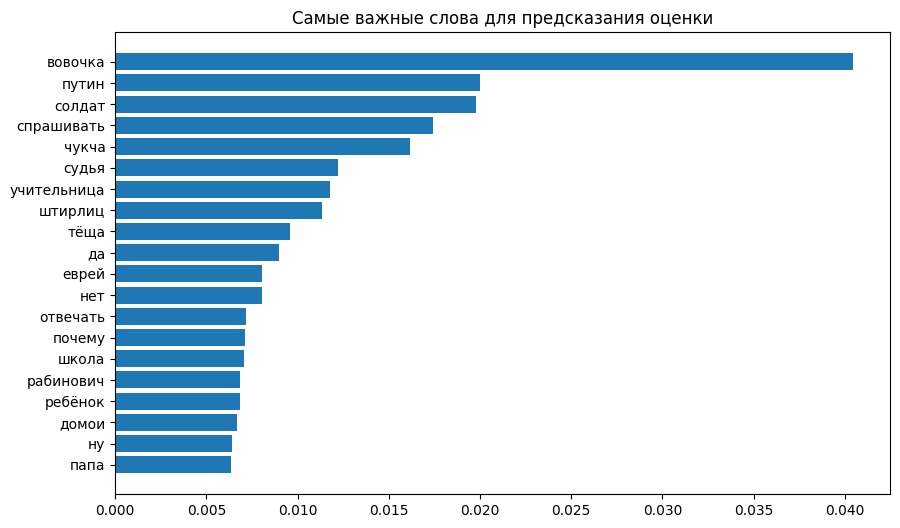

In [30]:
#Что влияет на оценку анекдота

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Подготовка данных (используем ту же векторизацию)
X = tfidf.transform(df['text_lemmas'])
y = df['rating']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модели для многоклассовой классификации
models = {
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10),
   # "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, max_depth=3, learning_rate=0.2)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.3f}")

    # Важность признаков (для Random Forest)
    if name == "Random Forest":
        import matplotlib.pyplot as plt
        top_words = 20
        indices = np.argsort(model.feature_importances_)[-top_words:]
        plt.figure(figsize=(10, 6))
        plt.barh(range(top_words), model.feature_importances_[indices])
        plt.yticks(range(top_words), np.array(tfidf.get_feature_names_out())[indices])
        plt.title("Самые важные слова для предсказания оценки")
        plt.show()

Определяем успех анекдота

Decision Tree отчет:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25546
           1       1.00      0.00      0.00       495

    accuracy                           0.98     26041
   macro avg       0.99      0.50      0.50     26041
weighted avg       0.98      0.98      0.97     26041



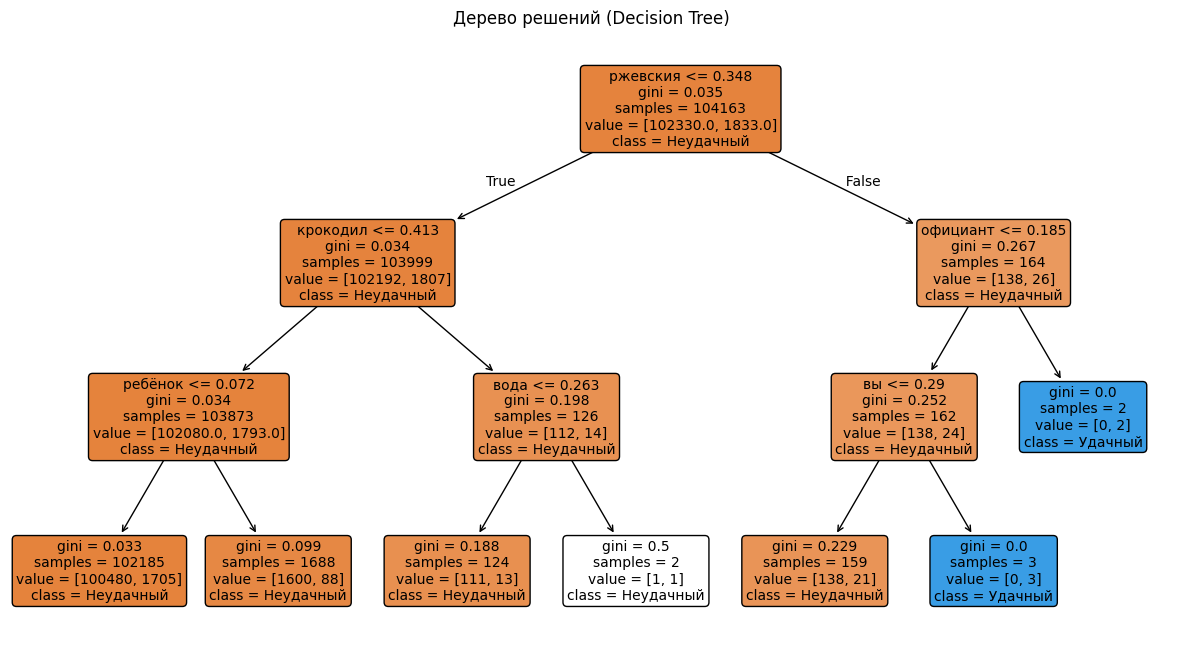

XGBoost отчет:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25546
           1       1.00      0.00      0.01       495

    accuracy                           0.98     26041
   macro avg       0.99      0.50      0.50     26041
weighted avg       0.98      0.98      0.97     26041



In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

df['cool'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)

# 1. Ограничиваем количество признаков при векторизации
tfidf = TfidfVectorizer(max_features=1000)  # Фиксируем 1000 признаков
X = tfidf.fit_transform(df['text_lemmas'])
y = df['cool']

# 2. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Модели с ограничением глубины
models = {
    "Decision Tree": DecisionTreeClassifier(
        max_depth=3,
        max_features='sqrt',  # Ограничиваем количество рассматриваемых признаков
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=50,
        max_depth=3,
        random_state=42
    )
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} отчет:\n{classification_report(y_test, y_pred)}")

    # Визуализация только если дерево не слишком большое
    if name == "Decision Tree" and model.tree_.max_depth <= 5:
        plt.figure(figsize=(15, 8))

        # Получаем актуальные имена признаков, используемых в дереве
        used_features = [feature for feature in model.tree_.feature if feature >= 0]
        unique_features = np.unique(used_features)
        feature_names = [tfidf.get_feature_names_out()[i] for i in unique_features]

        try:
            plot_tree(model,
                     feature_names=tfidf.get_feature_names_out(),
                     class_names=['Неудачный', 'Удачный'],
                     filled=True,
                     rounded=True,
                     fontsize=10,
                     max_depth=3)  # Ограничиваем глубину визуализации
            plt.title(f"Дерево решений ({name})")
            plt.show()
        except Exception as e:
            print(f"Не удалось визуализировать дерево: {str(e)}")

In [1]:
# Функция для предсказания
def predict_joke(text, model_choice='XGBoost'):
    """Предсказывает, будет ли анекдот успешным"""
    if model_choice not in models:
        print(f"Модель {model_choice} не найдена. Доступные: {list(models.keys())}")
        return

    vector = tfidf.transform([text])
    model = models[model_choice]
    pred = model.predict(vector)[0]
    proba = model.predict_proba(vector)[0][1] if hasattr(model, 'predict_proba') else None

    print(f"\nТекст: {text[:50]}...")
    print(f"Модель: {model_choice}")
    print(f"Предсказание: {'Крутой' if pred == 1 else 'Не крутой'}")
    if proba is not None:
        print(f"Вероятность: {proba:.1%}")

    return pred

# Пример использования
predict_joke("вовочка", model_choice='XGBoost')

NameError: name 'models' is not defined